In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [138]:
pj_retorno = pd.read_excel('Cashme - AN/Dados/Novos db/pj/Análise - PJ - Recusa.xlsx')
pj_reprova = pd.read_excel('Cashme - AN/Dados/Novos db/pj/Análise - PJ - Reprova.xlsx')

In [139]:
pj_retorno.head(10)

,Data de Criação,Produto,Valor do Crédito,Motivo Devolução,Referente a
0,2022-06-22 17:08:00,Home Equity,100000.0,OUTRO MOTIVO,PRO-173561-N1G5C1
1,2022-06-22 11:57:10,Home Equity,1000000.0,AJUSTE DE PARECER,PRO-170727-B4J3G8
2,2022-06-22 11:24:57,Home Equity,5000000.0,PENDENTE - DOCUMENTAÇÃO,PRO-172274-V2Y6C8
3,2022-06-21 16:59:48,Home Equity,3600000.0,PENDENTE - DOCUMENTAÇÃO,PRO-172951-F2W5G2
4,2022-06-21 14:49:50,Home Equity,270000.0,PENDENTE - DOCUMENTAÇÃO,PRO-173187-X9B4B2
5,2022-06-20 17:17:57,Home Equity,1200000.0,OUTRO MOTIVO,PRO-161338-S9S8P8
6,2022-06-20 15:53:56,Home Equity,2300000.0,PENDENTE - DOCUMENTAÇÃO,PRO-170332-S8H1C7
7,2022-06-20 10:56:11,Home Equity,5000000.0,PENDENTE - DOCUMENTAÇÃO,PRO-172274-V2Y6C8
8,2022-06-17 16:01:23,Home Equity,3000000.0,PENDENTE - ESCLARECIMENTO,PRO-168066-F6W3C5
9,2022-06-17 11:24:16,Home Equity,240000.0,PENDENTE - ESCLARECIMENTO,PRO-158846-K7Z9N5


In [140]:
pj_retorno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data de Criação   178 non-null    datetime64[ns]
 1   Produto           178 non-null    object        
 2   Valor do Crédito  178 non-null    float64       
 3   Motivo Devolução  178 non-null    object        
 4   Referente a       178 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 7.1+ KB


In [141]:
pj_retorno['Valor do Crédito'].describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

count        178.00
mean     1399273.77
std      1510427.74
min        50000.00
25%       300000.00
50%       800000.00
75%      2000000.00
95%      5000000.00
99%      6074285.73
max      6074285.73
Name: Valor do Crédito, dtype: float64

In [142]:
pj_retorno[["Valor do Crédito"]].value_counts(sort = False)

Valor do Crédito
50000.00            1
70000.00            1
100000.00           3
112000.00           1
115500.00           1
                   ..
4000000.00          4
4500000.00          1
5000000.00          8
5600000.00          1
6074285.73          3
Length: 69, dtype: int64

In [143]:
def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize=True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion"))
    plt.ylim(0,1)
    plt.show()

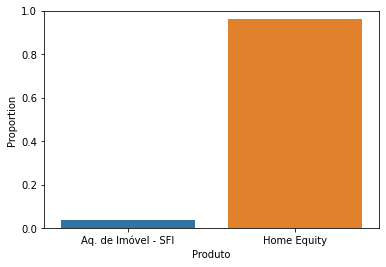

In [144]:
grafico_barras_prop(pj_retorno, variable = "Produto")

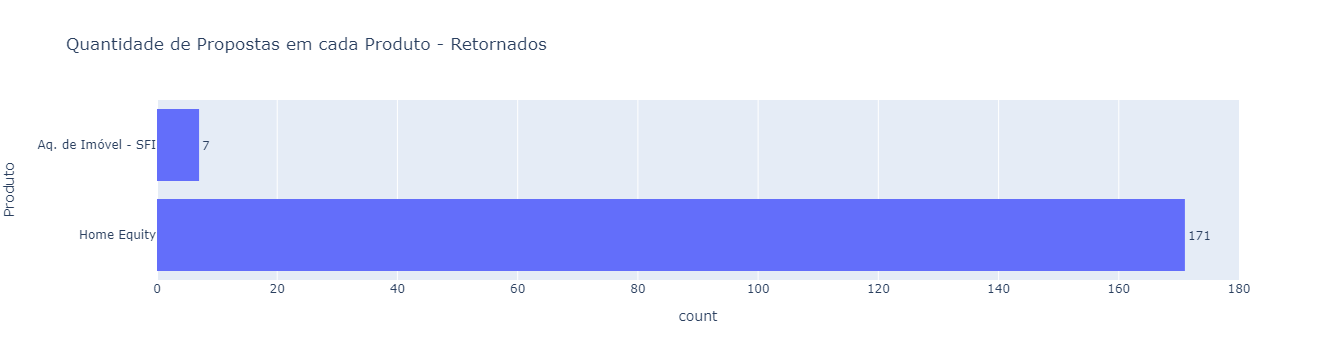

In [145]:
import plotly.graph_objects as go

fig = px.histogram(pj_retorno, y="Produto", nbins=20, text_auto=True, title="Quantidade de Propostas em cada Produto - Retornados")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

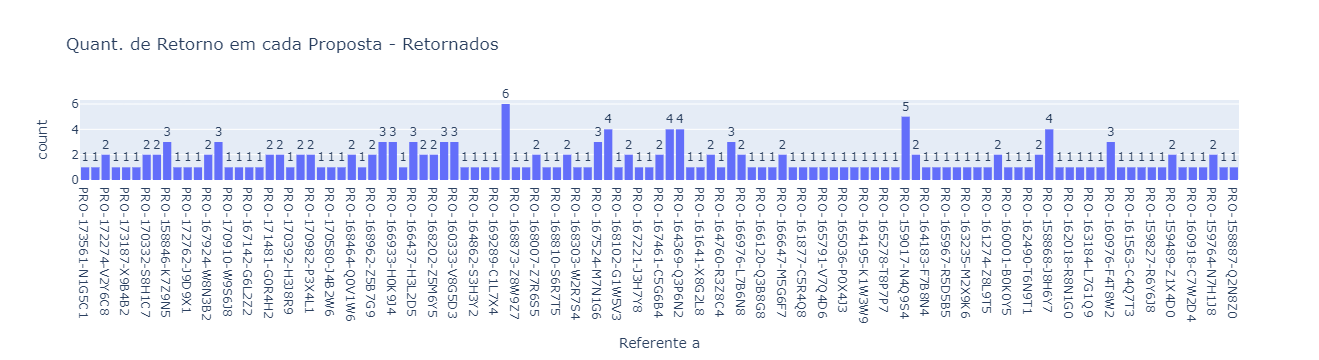

In [146]:
fig = px.histogram(pj_retorno, x="Referente a", nbins=20, text_auto=True, title="Quant. de Retorno em cada Proposta - Retornados")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

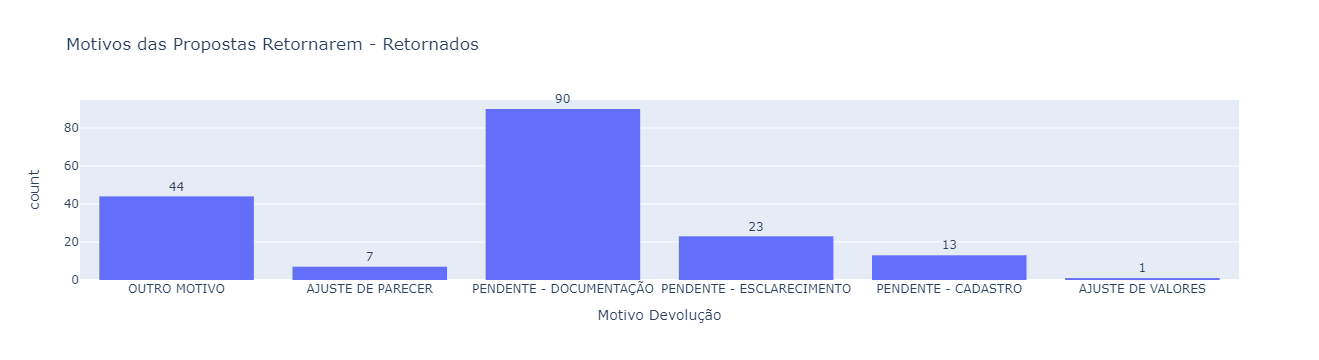

In [147]:
fig = px.histogram(pj_retorno, x="Motivo Devolução", nbins=20, text_auto=True, title="Motivos das Propostas Retornarem - Retornados")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

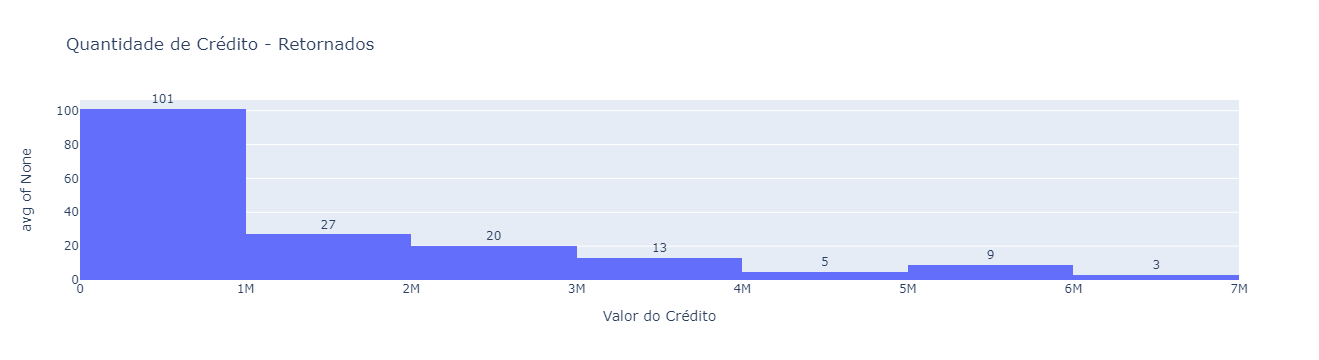

In [148]:
fig = px.histogram(pj_retorno, x="Valor do Crédito", histfunc="avg", nbins=8, text_auto=True, title="Quantidade de Crédito - Retornados")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [149]:
# Agora vamos ver as Distribuições vs o volume de crédito

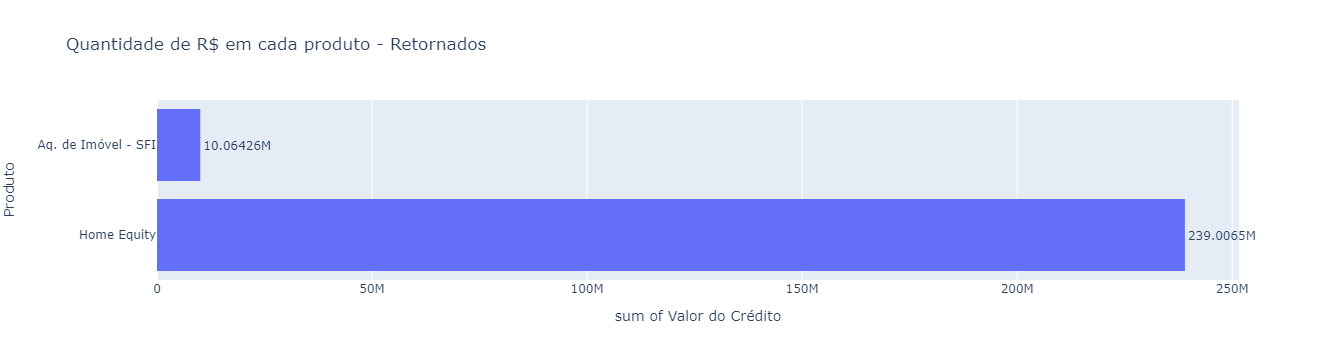

In [150]:
import plotly.express as px

fig = px.histogram(pj_retorno, x='Valor do Crédito', y='Produto', text_auto=True, title="Quantidade de R$ em cada produto - Retornados")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

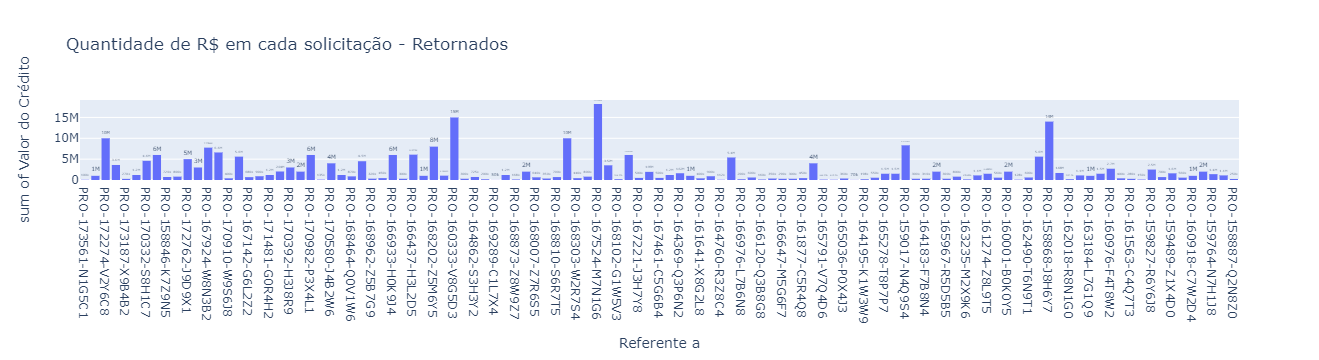

In [151]:
fig = px.histogram(pj_retorno, y='Valor do Crédito', x='Referente a', text_auto=True, title="Quantidade de R$ em cada solicitação - Retornados")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

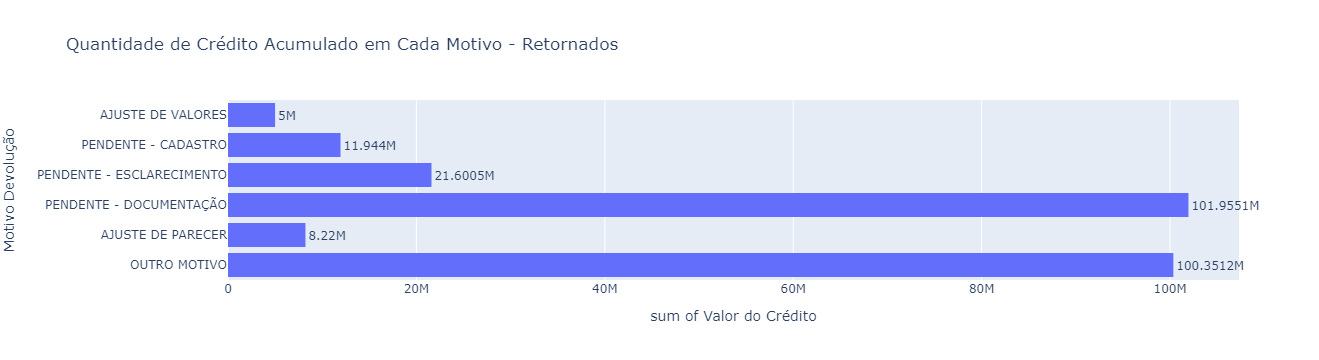

In [152]:
fig = px.histogram(pj_retorno, x='Valor do Crédito', y='Motivo Devolução', text_auto=True, title="Quantidade de Crédito Acumulado em Cada Motivo - Retornados")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [103]:
# Segunda Parte - Reprovados

In [224]:
pj_reprova.head()

,Data de Criação,Produto,Valor do Crédito,Motivo Devolução,Referente
0,2022-06-22 15:54:08,Home Equity,1500000.0,REPROVADO - RESTRIÇÕES BACEN/SERASA,PRO-169596-K3K5S0
1,2022-06-16 11:18:44,Home Equity,200000.0,REPROVADO - RISCO FINANCEIRO,PRO-172110-W1H1D6
2,2022-06-16 09:47:18,Home Equity,2500000.0,REPROVADO - RISCO FINANCEIRO,PRO-161574-V6R1P6
3,2022-06-14 17:39:20,Home Equity,2200000.0,REPROVADO - IMÓVEL NÃO ACEITO (REGIÃO),PRO-161960-N4J1G6
4,2022-06-13 18:51:45,Home Equity,700000.0,REPROVADO - RESTRIÇÕES BACEN/SERASA,PRO-171625-K8P8T3


In [106]:
pj_reprova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data de Criação   159 non-null    datetime64[ns]
 1   Produto           159 non-null    object        
 2   Valor do Crédito  159 non-null    float64       
 3   Motivo Devolução  159 non-null    object        
 4   Referente         159 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 6.3+ KB


In [153]:
#Visualizando o média e etc

In [110]:
# Vendo a proporção

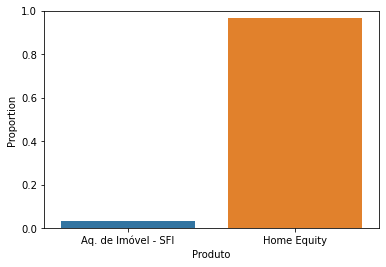

In [ ]:
grafico_barras_prop(pj_reprova, variable = "Produto")

In [111]:
# Vendo a Contagem de cada Coluna

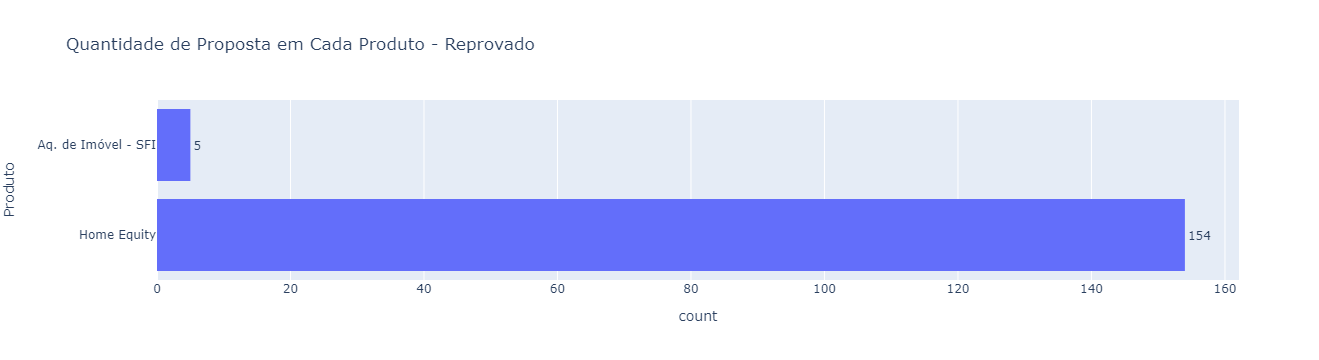

In [113]:
fig = px.histogram(pj_reprova, y="Produto", nbins=20, text_auto=True, title="Quantidade de Proposta em Cada Produto - Reprovado")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

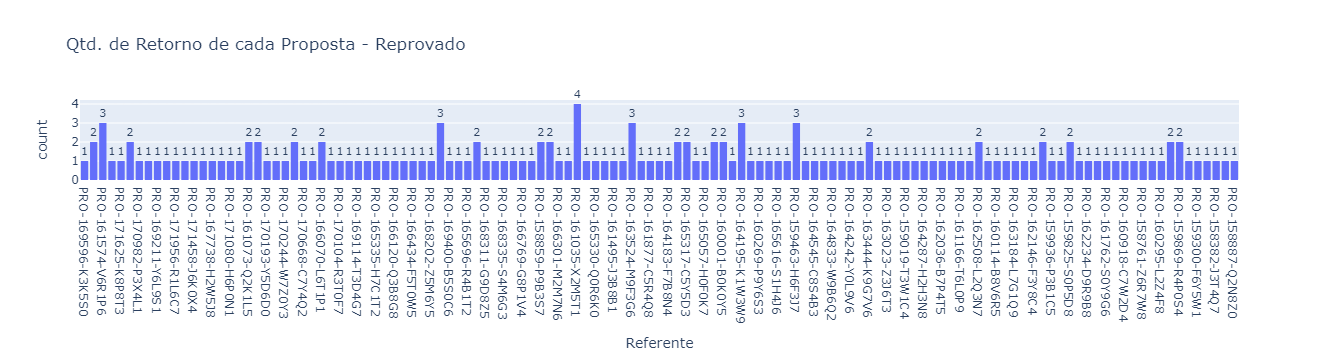

In [121]:
fig = px.histogram(pj_reprova, x="Referente", nbins=20, text_auto=True, title="Qtd. de Retorno de cada Proposta - Reprovado")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

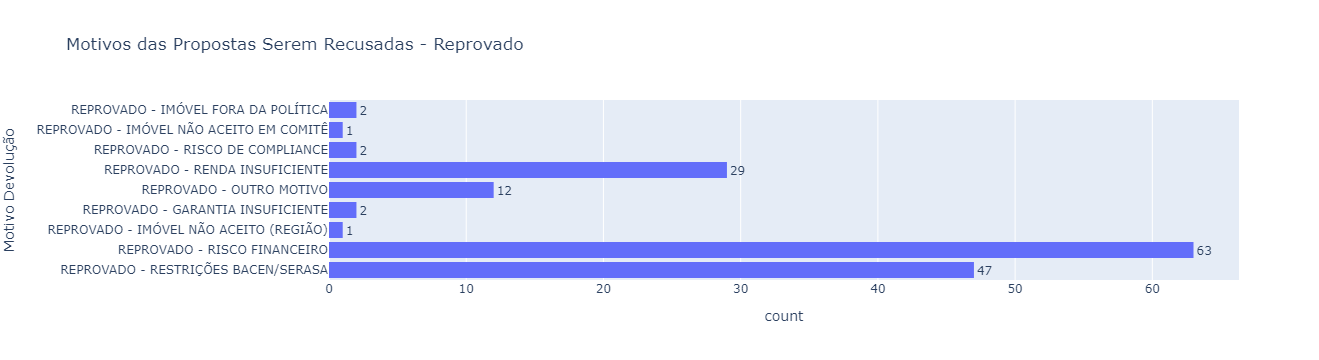

In [223]:
fig = px.histogram(pj_reprova, y="Motivo Devolução", nbins=20, text_auto=True, title="Motivos das Propostas Serem Recusadas - Reprovado")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

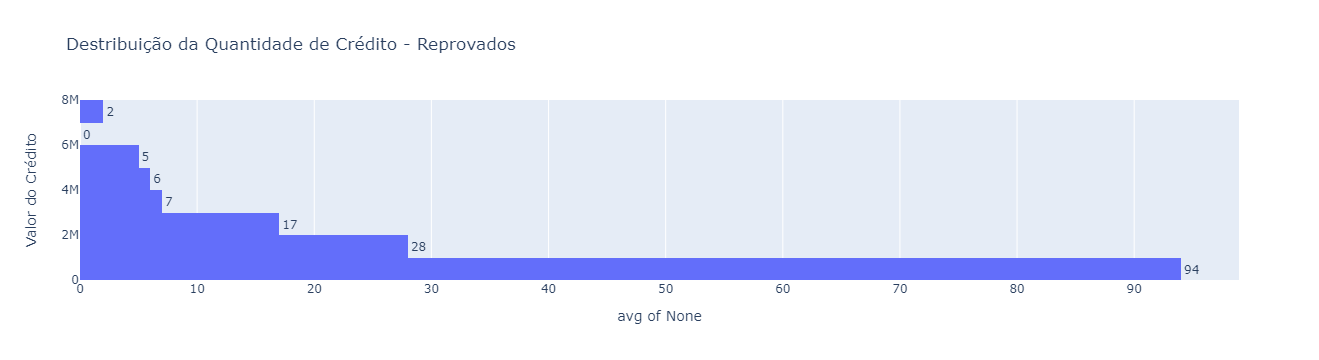

In [221]:
fig = px.histogram(pj_reprova, y="Valor do Crédito", histfunc="avg", nbins=8, text_auto=True, title="Destribuição da Quantidade de Crédito - Reprovados")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [133]:
# Agora vamos ver as Distribuições vs o volume de crédito

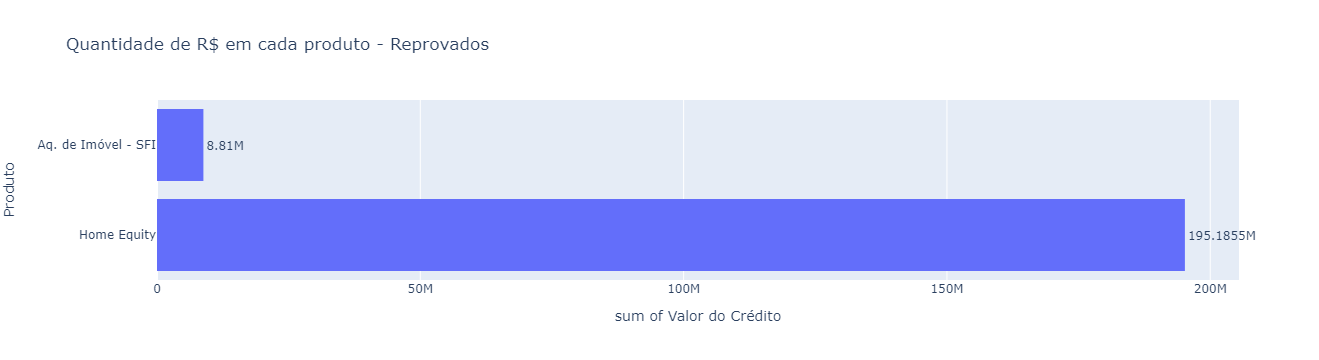

In [135]:
fig = px.histogram(pj_reprova, x='Valor do Crédito', y='Produto', text_auto=True, title="Quantidade de R$ em cada produto - Reprovados")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

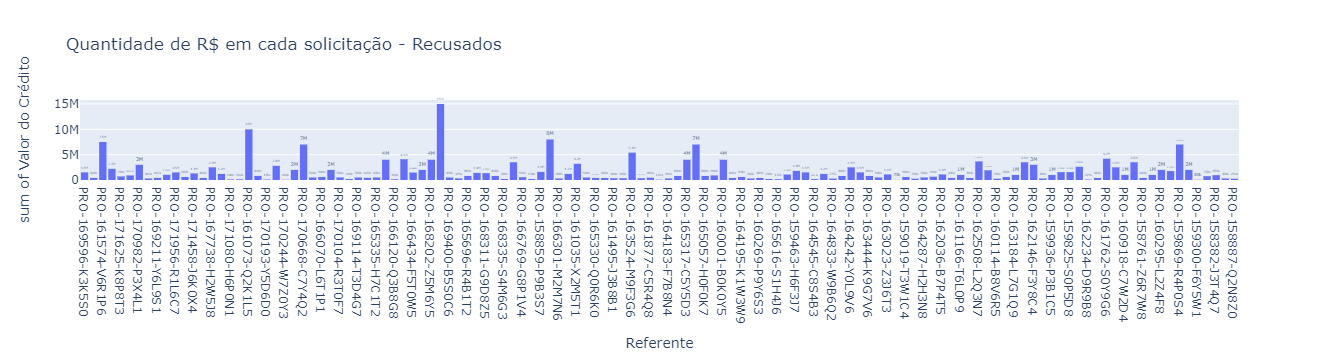

In [136]:
fig = px.histogram(pj_reprova, y='Valor do Crédito', x='Referente', text_auto=True, title="Quantidade de R$ em cada solicitação - Recusados")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

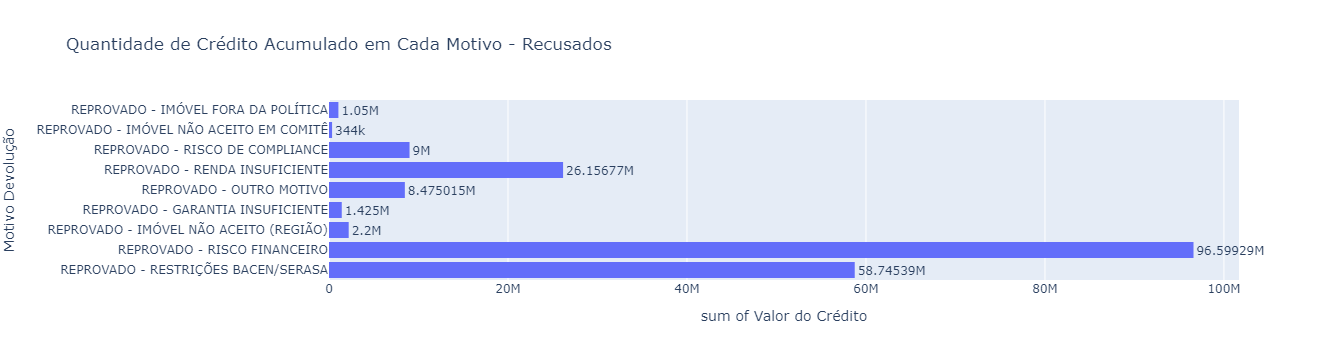

In [137]:
fig = px.histogram(pj_reprova, x='Valor do Crédito', y='Motivo Devolução', text_auto=True, title="Quantidade de Crédito Acumulado em Cada Motivo - Recusados")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [217]:
# Vendo o Macro

In [225]:
vv = pd.read_excel('Cashme - AN/Dados/Novos db/pj/retorno x recusado - PJ.xlsx')

In [226]:
vv.head()

,r_p,credito
0,REPROVADO,1500000.0
1,REPROVADO,200000.0
2,REPROVADO,2500000.0
3,REPROVADO,2200000.0
4,REPROVADO,700000.0


In [227]:
vv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   r_p      337 non-null    object 
 1   credito  337 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.4+ KB


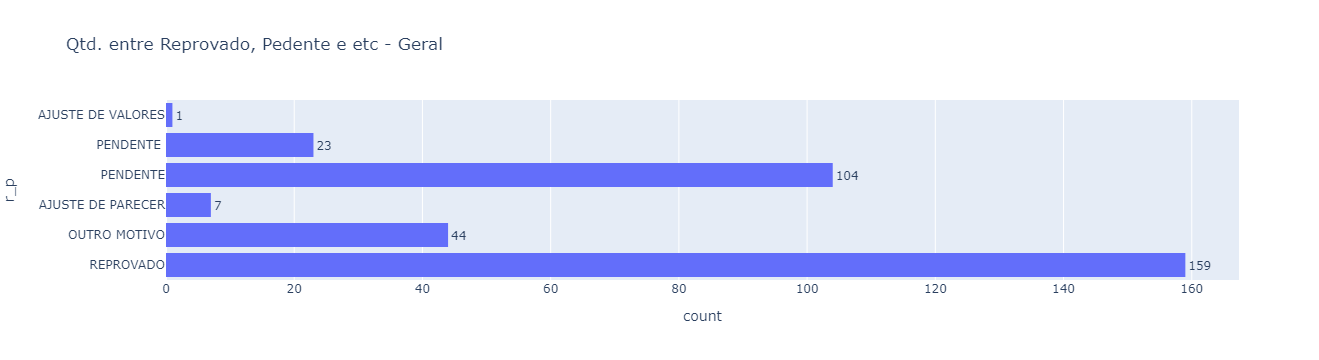

In [220]:
fig = px.histogram(vv, y='r_p', text_auto=True, title="Qtd. entre Reprovado, Pedente e etc - Geral")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

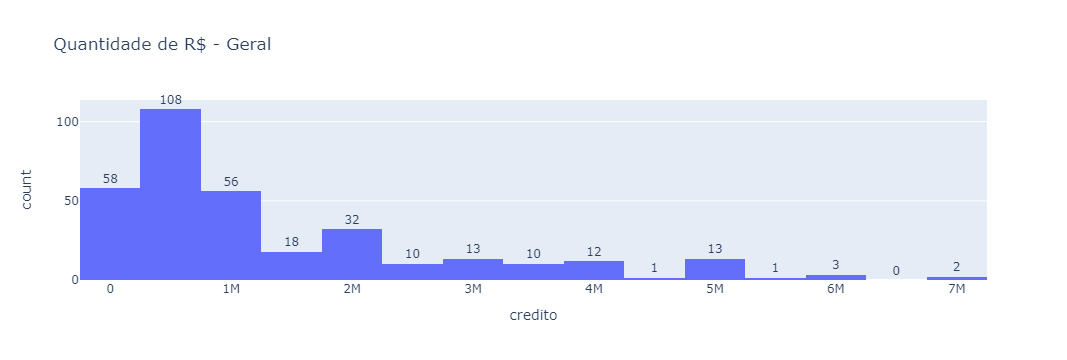

In [238]:
fig = px.histogram(vv, x='credito', text_auto=True, title="Quantidade de R$ - Geral")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [230]:
vv['credito'].sum()

453066197.86

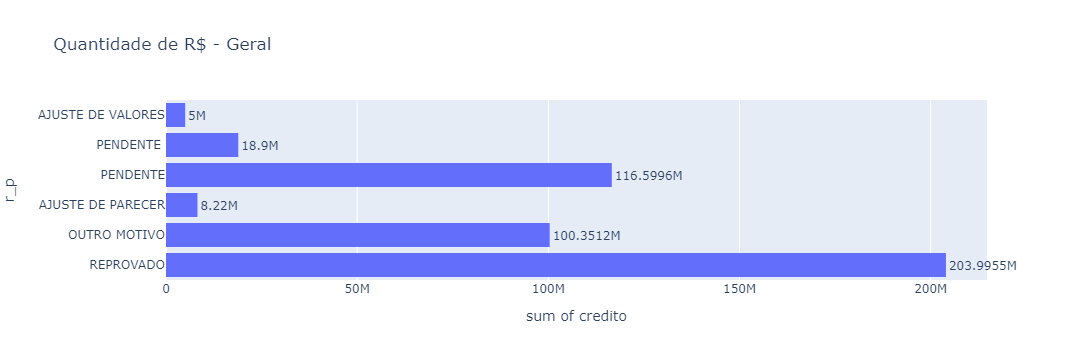

In [245]:
fig = px.histogram(vv, x='credito', y='r_p', text_auto=True, title="Quantidade de R$ - Geral")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()